# This notebook will familiarise you with more advanced topics for ML. This is a run only notebook where you just need to run and understand every cell. No need to edit any part, but it is encouraged that you do edit parts of the hyperparameters to see how the accuracy changes.

In [1]:
!pip install pandas matplotlib scikit-learn imbalanced-learn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
orig_data = pd.read_csv("Original_Dataset.csv")
print(orig_data.head(2))

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  


## We decide that only top 4 symptoms are enough to determine the disease. So let's drop everything except the columns ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']
[ ]


In [4]:
# These are the features we want as input
X_cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']
# And Disease is what we want to predict, so this will be y
orig_data = orig_data[['Disease'] + X_cols]

In [5]:
# also fill NaN with 'no_symptom'
orig_data = orig_data.fillna('no_symptom')

print(orig_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4920 non-null   object
dtypes: object(5)
memory usage: 192.3+ KB
None


In [6]:
orig_data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,no_symptom
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,no_symptom
3,Fungal infection,itching,skin_rash,dischromic _patches,no_symptom
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,no_symptom
...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


### Now we need to convert everything into dictionaries. Fortunately, we don't need to compute uniques since we also have other csvs with that information.
[ ]


In [7]:
disease_and_doctor = pd.read_csv("Doctor_Versus_Disease.csv", encoding='unicode_escape', header=None)
disease_and_doctor.columns = ['Disease', 'Doctor']


In [8]:
disease_and_doctor.head()

,Disease,Doctor
0,Drug Reaction,Allergist
1,Allergy,Allergist
2,Hypertension,Cardiologist
3,Heart attack,Cardiologist
4,Psoriasis,Dermatologist


In [9]:
# For the symptoms, we will see how to collect all the values and make sets out of them
symptoms = set()
for col in X_cols:
    symptoms.update(set(orig_data[col].values))
symptoms = list(symptoms)

In [10]:
## Make the dictionaries
disease_dict = dict()
inv_disease_dict = dict()

for i in range(len(disease_and_doctor)):
    dis, doc = disease_and_doctor.iloc[i].values
    disease_dict[dis] = i
    inv_disease_dict[i] = dis


symptom_dict = dict()
inv_symptom_dict = dict()

for i in range(len(symptoms)):
    sym = symptoms[i]
    symptom_dict[sym] = i
    inv_symptom_dict[i] = sym

In [11]:
print(symptom_dict)

{' nausea': 0, ' dischromic _patches': 1, ' movement_stiffness': 2, ' ulcers_on_tongue': 3, ' continuous_feel_of_urine': 4, ' weakness_of_one_body_side': 5, ' pain_during_bowel_movements': 6, ' dark_urine': 7, ' chest_pain': 8, ' nodal_skin_eruptions': 9, ' patches_in_throat': 10, ' headache': 11, 'no_symptom': 12, ' indigestion': 13, ' cough': 14, ' foul_smell_of urine': 15, ' lack_of_concentration': 16, ' weight_gain': 17, ' painful_walking': 18, ' irregular_sugar_level': 19, ' stiff_neck': 20, ' muscle_weakness': 21, ' pus_filled_pimples': 22, ' weight_loss': 23, ' passage_of_gases': 24, ' small_dents_in_nails': 25, ' restlessness': 26, ' scurring': 27, ' pain_in_anal_region': 28, ' diarrhoea': 29, ' swelling_of_stomach': 30, ' hip_joint_pain': 31, ' excessive_hunger': 32, ' abdominal_pain': 33, ' swollen_legs': 34, ' skin_peeling': 35, ' continuous_sneezing': 36, ' fatigue': 37, ' obesity': 38, ' yellowing_of_eyes': 39, ' red_sore_around_nose': 40, ' burning_micturition': 41, ' spo

In [12]:
print(symptom_dict)

{' nausea': 0, ' dischromic _patches': 1, ' movement_stiffness': 2, ' ulcers_on_tongue': 3, ' continuous_feel_of_urine': 4, ' weakness_of_one_body_side': 5, ' pain_during_bowel_movements': 6, ' dark_urine': 7, ' chest_pain': 8, ' nodal_skin_eruptions': 9, ' patches_in_throat': 10, ' headache': 11, 'no_symptom': 12, ' indigestion': 13, ' cough': 14, ' foul_smell_of urine': 15, ' lack_of_concentration': 16, ' weight_gain': 17, ' painful_walking': 18, ' irregular_sugar_level': 19, ' stiff_neck': 20, ' muscle_weakness': 21, ' pus_filled_pimples': 22, ' weight_loss': 23, ' passage_of_gases': 24, ' small_dents_in_nails': 25, ' restlessness': 26, ' scurring': 27, ' pain_in_anal_region': 28, ' diarrhoea': 29, ' swelling_of_stomach': 30, ' hip_joint_pain': 31, ' excessive_hunger': 32, ' abdominal_pain': 33, ' swollen_legs': 34, ' skin_peeling': 35, ' continuous_sneezing': 36, ' fatigue': 37, ' obesity': 38, ' yellowing_of_eyes': 39, ' red_sore_around_nose': 40, ' burning_micturition': 41, ' spo

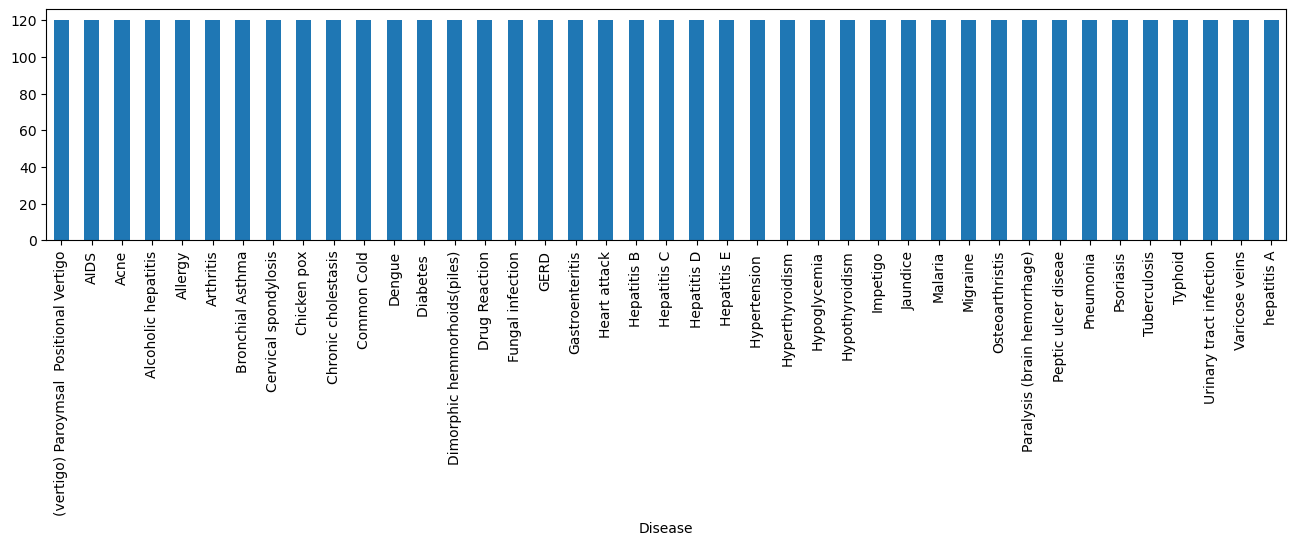

In [13]:
# A quick visualisation
orig_data.groupby('Disease')['Symptom_1'].count().plot(kind='bar', figsize=(16, 3))
plt.show()

### Very uniform dataset
()

In [14]:
# let's transform the data to numerical data
orig_data['Disease'] = orig_data['Disease'].map(disease_dict)
for col in X_cols:
    orig_data[col] = orig_data[col].map(symptom_dict)

print(orig_data.head(2))

   Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4
0        8         68         86          9          1
1        8         86          9          1         12


In [15]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Disease    4920 non-null   int64
 1   Symptom_1  4920 non-null   int64
 2   Symptom_2  4920 non-null   int64
 3   Symptom_3  4920 non-null   int64
 4   Symptom_4  4920 non-null   int64
dtypes: int64(5)
memory usage: 192.3 KB


In [16]:
# Let's split it into training and testing data

training_data = orig_data.sample(frac=0.7, random_state=42)
testing_data = orig_data.loc[~orig_data.index.isin(training_data.index)]


In [17]:
print(f"Training data shape: {training_data.shape}, Testing data shape: {testing_data.shape}")

Training data shape: (3444, 5), Testing data shape: (1476, 5)


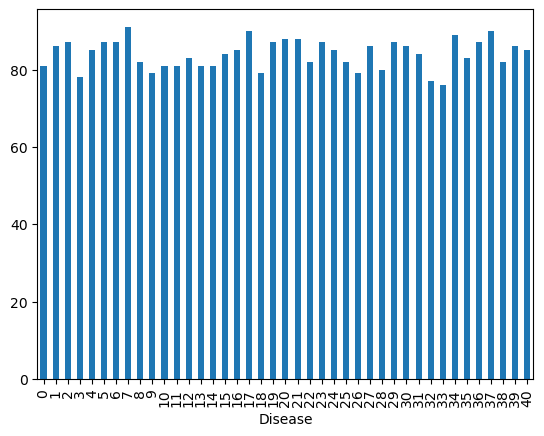

In [18]:
# quickly check if the statistics changed
training_data.groupby('Disease')['Symptom_1'].count().plot(kind='bar')
plt.show()

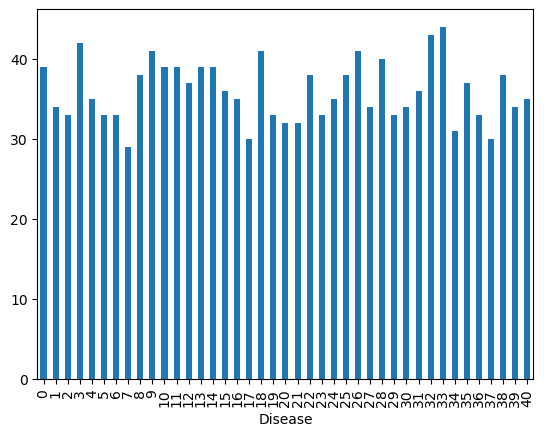

In [19]:
# also check if the testing data looks the same
testing_data.groupby('Disease')['Symptom_1'].count().plot(kind='bar')
plt.show()

### We see that the training and testing split distributed each class non-uniformly across the two datasets. This is okay, as in a real world scenario, we might find one disease having more cases than others.

In [20]:
# create the data, identify X and y
train_x, train_y = training_data[X_cols], training_data['Disease']
# create the test data
test_x, test_y = testing_data[X_cols], testing_data['Disease']

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(train_x, train_y)

RandomForestClassifier(n_estimators=20)

In [23]:
predictions = rf_classifier.predict(test_x)

In [24]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        39
          11       1.00      1.00      1.00        39
          12       1.00      1.00      1.00        37
          13       1.00      1.00      1.00        39
          14       1.00      1.00      1.00        39
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1.00        35
          17       1.00    

### You should get really high accuracy(99%) over 1476 data points

#### You should try to beat this by some hyper-parameter optimization

### Let's load the other dataset, the bankruptcy dataset

In [25]:
# Let's load the bankruptcy data and see what's in there
cb_data = pd.read_csv("data.csv")

print(cb_data.head(2))

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809 

In [26]:
cb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### This is a really nice dataset with everything handed to us in numerical data type. From the column names, we can identify "Bankrupt?" column is our target column, and the rest are our input columns


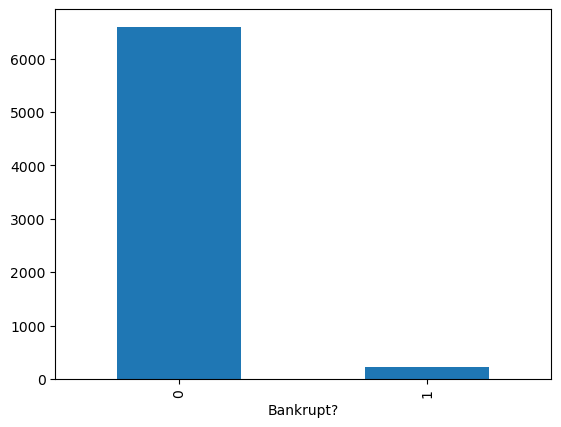

In [27]:
# Before we proceed, let's just check how the data distribution between the two classes look
cb_data.groupby('Bankrupt?')[' Cash flow rate'].count().plot(kind='bar')
plt.show()

### Woah! most of our data points signify that we don't have many companies going bankrupt in our dataset.
[ ]


In [28]:
# split the dataset into training and testing
X_cb = list(cb_data.columns)
y_cb = X_cb.pop(0)


train_cb_data = cb_data.sample(frac=0.7, random_state=42)
test_cb_data = cb_data.loc[~cb_data.index.isin(train_cb_data.index)]


train_x, train_y = train_cb_data[X_cb], train_cb_data[y_cb]
test_x, test_y = test_cb_data[X_cb], test_cb_data[y_cb]

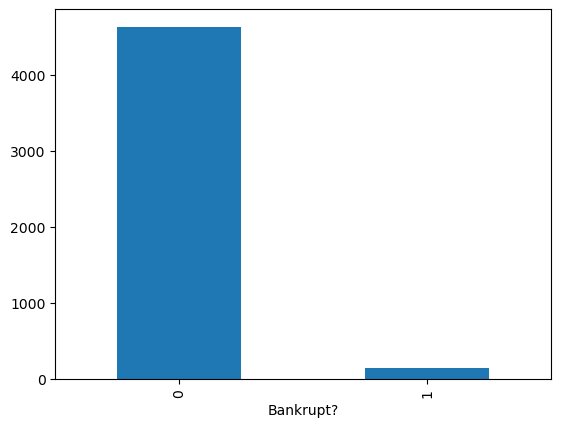

In [29]:
# check if everything looks the
train_cb_data.groupby('Bankrupt?')[' Cash flow rate'].count().plot(kind='bar')
plt.show()

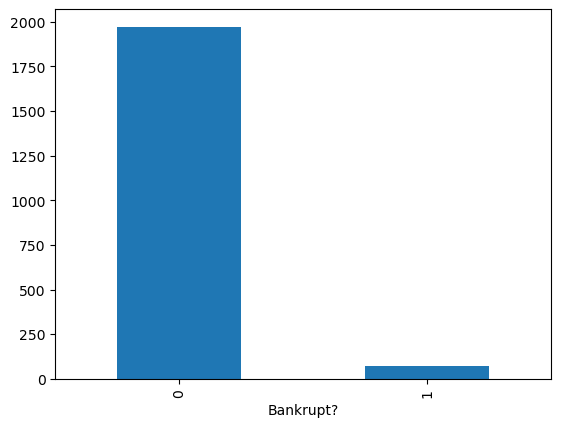

In [30]:
test_cb_data.groupby('Bankrupt?')[' Cash flow rate'].count().plot(kind='bar')
plt.show()

In [31]:
# Let's train a random forest again, just to see what outcomes we get
rf_cb = RandomForestClassifier(n_estimators=20)
rf_cb.fit(train_x, train_y)
predictions = rf_cb.predict(test_x)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1972
           1       0.55      0.08      0.14        74

    accuracy                           0.96      2046
   macro avg       0.76      0.54      0.56      2046
weighted avg       0.95      0.96      0.95      2046



### We have very poor f1-score for the bankruptcy class (1). Which defeats the purpose of our model

What can we do next
?
Introducing SMOTE : Synthetic Minority Over-sampling Technique
[ ]


In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_x, train_y)

In [33]:
# let's re-use the random forest object, rf_cb
rf_cb.fit(X_res, y_res)
predictions = rf_cb.predict(test_x)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1972
           1       0.39      0.45      0.42        74

    accuracy                           0.95      2046
   macro avg       0.68      0.71      0.70      2046
weighted avg       0.96      0.95      0.96      2046



 ### A Slight improvement, can we do anything else?

### Introducing Under-sampling using ClusterCentroids



In [36]:
from imblearn.under_sampling import ClusterCentroids

In [37]:
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(train_x, train_y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
# let's re-use the random forest object, rf_cb and check again
rf_cb.fit(X_res, y_res)
predictions = rf_cb.predict(test_x)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1972
           1       0.07      0.99      0.13        74

    accuracy                           0.52      2046
   macro avg       0.53      0.74      0.40      2046
weighted avg       0.97      0.52      0.65      2046



### Not so much! Let's try both


## Introducing SMOTEENN : Over sample with SMOTE, undersample with Edited Nearest Neighbor

In [39]:
from imblearn.combine import SMOTEENN

In [40]:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(train_x, train_y)

In [41]:
# How about now?
rf_cb.fit(X_res, y_res)
predictions = rf_cb.predict(test_x)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1972
           1       0.35      0.54      0.42        74

    accuracy                           0.95      2046
   macro avg       0.67      0.75      0.70      2046
weighted avg       0.96      0.95      0.95      2046



## It seems like over sampling the bankrupt class decreases the performance. This is intuitive, since bankruptcy (since there is very less data) could be modelled incorrectly. So in this case, under-sampling the non-bankrupt class works out pretty well.


### Let's do some more analysis on the data

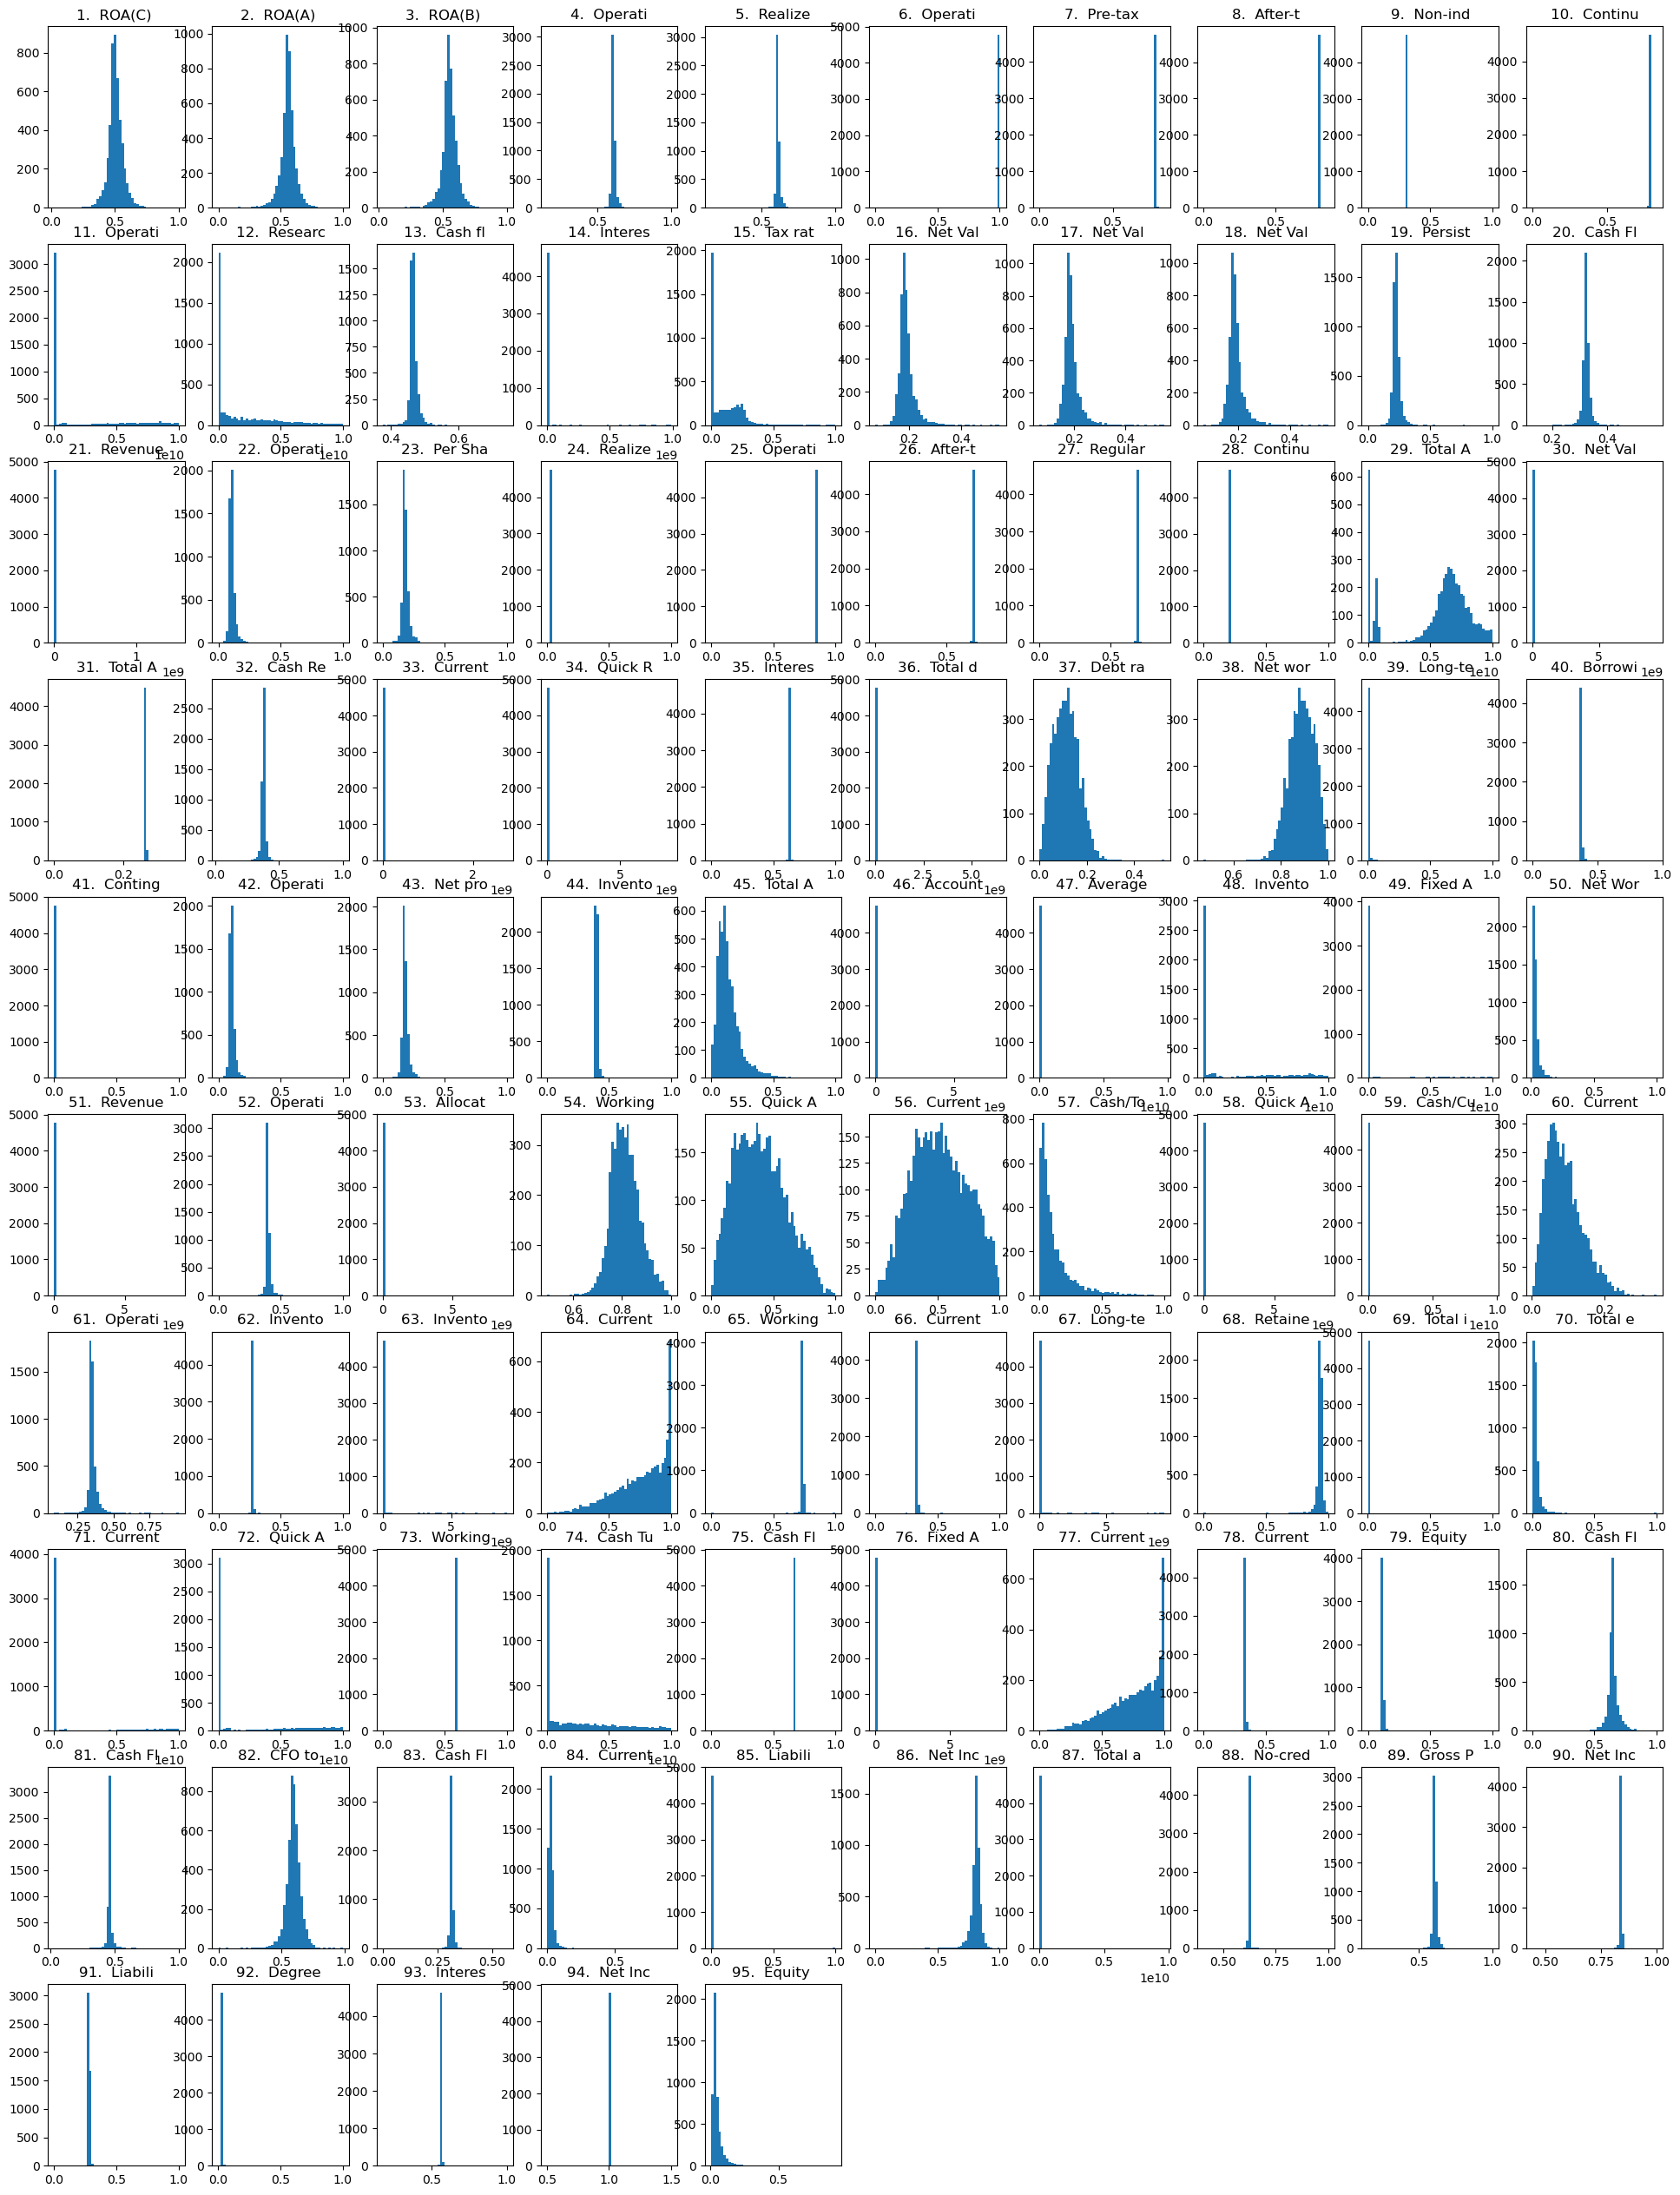

In [42]:
sq_r = int(np.sqrt(len(X_cb))) + 1
plt.figure(figsize=(24, 32))
for i in range(len(X_cb)):
    plt.subplot(sq_r, sq_r, i+1)
    plt.hist(train_cb_data[X_cb[i]].values, bins=50)   
    plt.title(f"{i+1}. {X_cb[i][:8]}")
plt.show()

## Not all the features are well spread out (low variance), hence might not contain enough information. Let's pick out a few columns and see if that improves our accuracy over the less represented class
[ ]


In [44]:
resam_cb_X = X_cb[0:3] + X_cb[36:38] + X_cb[53:56]
print(resam_cb_X)

[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Debt ratio %', ' Net worth/Assets', ' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets']


In [45]:
# We will only use the above 8 columns and see if SMOTE helps improve it further
X_res, y_res = sm.fit_resample(train_x[resam_cb_X], train_y)
X_test_resampled = test_x[resam_cb_X]

In [46]:
rf_cb.fit(X_res, y_res)
predictions = rf_cb.predict(X_test_resampled)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1972
           1       0.27      0.53      0.35        74

    accuracy                           0.93      2046
   macro avg       0.62      0.74      0.66      2046
weighted avg       0.96      0.93      0.94      2046



### Not bad for 8 columns. But the best performance is still 43% with SMOTE
